In [1]:
# Import Important Libraries
import sklearn
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
# import math
import matplotlib.pyplot as plt

import pandas as pd
import numpy.polynomial.polynomial as poly

from sklearn.metrics import accuracy_score
%matplotlib inline
%matplotlib inline

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv',header = 0)
df = df.dropna()


In [3]:
#Extract our weapons features
weapons_ct = df.loc[:, 'ct_weapon_ak47':'ct_weapon_tec9':2]
weapons_t = df.loc[:, 't_weapon_ak47':'t_weapon_tec9':2]


#Compile list of costs for each weapon
cost_list = np.array([2700,3300,4750,1400,500,400,2050,5000,1800,200,5200,2900,3100,1050,1300,1500,1500,1250,1700,1050,2350,600,1100,5000,3000,1700,1200,2000,700,500,200,300,200,500])
cost_list = np.transpose(cost_list)
#Calculate total weapon costs for T and CT
total_cost_ct = np.dot(weapons_ct,cost_list)
total_cost_t = np.dot(weapons_t,cost_list)


In [4]:
#drop our weapons and add our new features
df_NW = df.drop(df.iloc[:, 16:84], axis = 1)
df_NW.insert(17,"Total Weapon Cost T", np.transpose(total_cost_t))
df_NW.insert(17,"Total Weapon Cost CT", np.transpose(total_cost_ct))


In [5]:
#replace our values with values
df_NW["round_winner"] = np.where(df_NW.round_winner ==  "CT", 1, 0)
df_NW["bomb_planted"] = np.where(df_NW.bomb_planted ==  "True", 1,0)
#separate our dataset by map
df_dust2 = df_NW.loc[df_NW["map"] == "de_dust2"]
df_inferno = df_NW.loc[df_NW["map"] == "de_inferno"]
df_nuke = df_NW.loc[df_NW["map"] == "de_nuke"]
df_mirage = df_NW.loc[df_NW["map"] == "de_mirage"]
df_overpass = df_NW.loc[df_NW["map"] == "de_overpass"]
df_vertigo = df_NW.loc[df_NW["map"] == "de_vertigo"]
df_train  = df_NW.loc[df_NW["map"] == "de_train"]
#compile list for looping over
df_lst = [df_dust2,df_inferno,df_nuke,df_mirage,df_overpass,df_vertigo,df_train]

In [6]:
scaler = preprocessing.StandardScaler()

In [7]:
#running logreg with l1 regularization
def logreg_l1(c_lst, data_lst):
    #for each map
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        #keeping track of various values
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []   
        w = 
        #Extract our target and features matrix
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])
        #get rid of map and round_winner features
        df = dataf.drop(["map","round_winner"], axis = 1)


        Y=Y.astype(float)
        #scale our data        
        X_scale = scaler.fit_transform(df)
        X_scale=X_scale.astype(float)

        #split our data
        X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=30)
        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)
        for c in c_lst:
                #create logreg object
                logreg = LogisticRegression(penalty = 'l1',C=c, solver = 'saga')

                
                #fit our data
                logreg.fit(X_train, Y_train)
                #get weights for hyperplane and append to our list
                weights = logreg.coef_
                w.append(np.sqrt(np.sum(np.square(weights))))

                
                #precict 
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                # Find the accuracy achieved on testing and training
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)
        #plot c vs accuracy
        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L1 Regularization: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

               
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg L1 Reg %s" % curr_map)
        plt.show()
        #plot c vs |w|
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, L1 %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, L1 %s" % curr_map, format = 'png')
        plt.show()
        


Accuracy on training data = 0.541847
Accuracy on testing data = 0.539559
Accuracy on training data = 0.740005
Accuracy on testing data = 0.744400
Accuracy on training data = 0.746086
Accuracy on testing data = 0.753251
Accuracy on training data = 0.748194
Accuracy on testing data = 0.753432
Accuracy on training data = 0.747772
Accuracy on testing data = 0.751987
Accuracy on training data = 0.747652
Accuracy on testing data = 0.751987


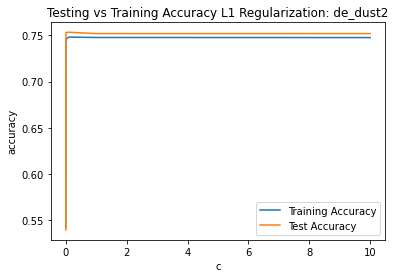

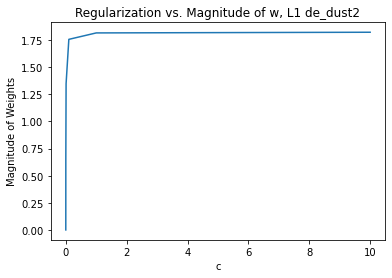

Accuracy on training data = 0.544966
Accuracy on testing data = 0.549135
Accuracy on training data = 0.732613
Accuracy on testing data = 0.740299
Accuracy on training data = 0.747116
Accuracy on testing data = 0.752058
Accuracy on training data = 0.748292
Accuracy on testing data = 0.750714
Accuracy on training data = 0.748516
Accuracy on testing data = 0.750210
Accuracy on training data = 0.748516
Accuracy on testing data = 0.749706


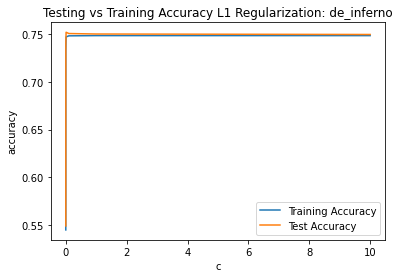

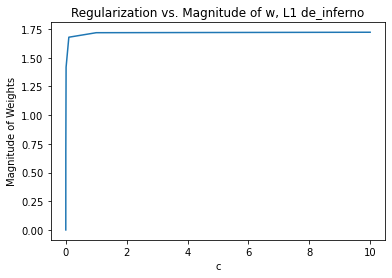

Accuracy on training data = 0.535534
Accuracy on testing data = 0.540887
Accuracy on training data = 0.734931
Accuracy on testing data = 0.737860
Accuracy on training data = 0.745304
Accuracy on testing data = 0.744377
Accuracy on training data = 0.745234
Accuracy on testing data = 0.745848
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689


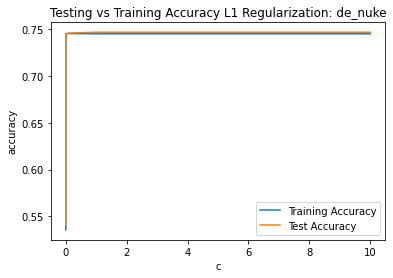

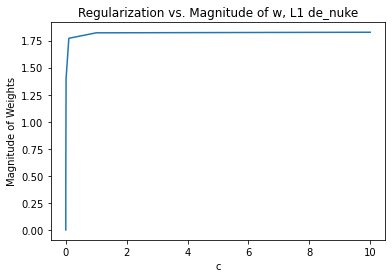

Accuracy on training data = 0.505814
Accuracy on testing data = 0.513566
Accuracy on training data = 0.750646
Accuracy on testing data = 0.740095
Accuracy on training data = 0.756962
Accuracy on testing data = 0.739449
Accuracy on training data = 0.752728
Accuracy on testing data = 0.740095
Accuracy on training data = 0.751794
Accuracy on testing data = 0.738372
Accuracy on training data = 0.751651
Accuracy on testing data = 0.739664


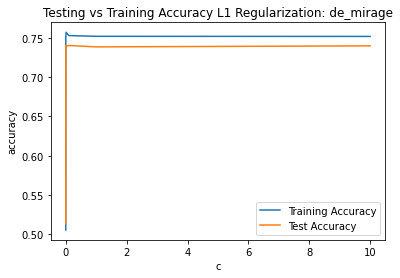

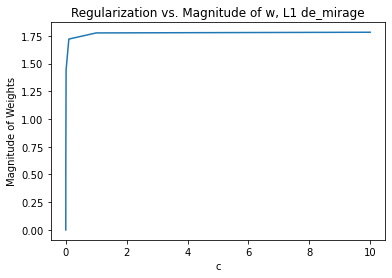

Accuracy on training data = 0.500284
Accuracy on testing data = 0.495030
Accuracy on training data = 0.748295
Accuracy on testing data = 0.746095
Accuracy on training data = 0.758523
Accuracy on testing data = 0.759727
Accuracy on training data = 0.758333
Accuracy on testing data = 0.760863
Accuracy on training data = 0.758239
Accuracy on testing data = 0.762283
Accuracy on training data = 0.757670
Accuracy on testing data = 0.761999


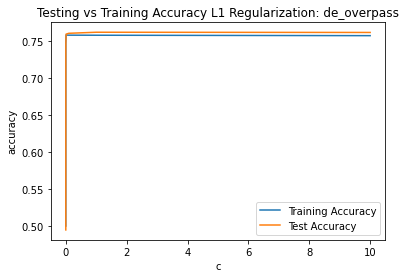

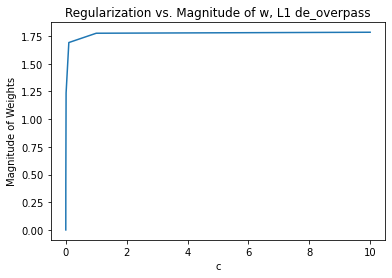

Accuracy on training data = 0.531011
Accuracy on testing data = 0.525314
Accuracy on training data = 0.721624
Accuracy on testing data = 0.724237
Accuracy on training data = 0.757304
Accuracy on testing data = 0.750808
Accuracy on training data = 0.758860
Accuracy on testing data = 0.754399
Accuracy on training data = 0.757543
Accuracy on testing data = 0.752603
Accuracy on training data = 0.757304
Accuracy on testing data = 0.752962


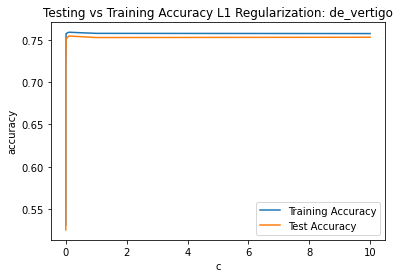

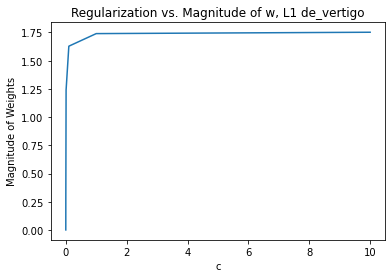

Accuracy on training data = 0.544574
Accuracy on testing data = 0.533650
Accuracy on training data = 0.732951
Accuracy on testing data = 0.739401
Accuracy on training data = 0.751137
Accuracy on testing data = 0.757486
Accuracy on training data = 0.750741
Accuracy on testing data = 0.762229
Accuracy on training data = 0.749951
Accuracy on testing data = 0.760154
Accuracy on training data = 0.749951
Accuracy on testing data = 0.758672


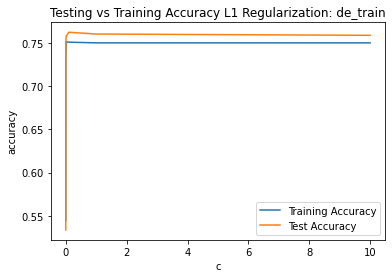

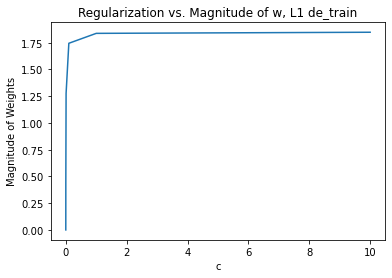

In [8]:
#initialize our c(s) and run our function
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
logreg_l1(cVals,df_lst)

In [9]:
#logreg with l2 regularization, refer to above function for notes
def logreg_l2(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []   
        w = []
        
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

        df = dataf.drop(["map","round_winner"], axis = 1)


        Y=Y.astype(float)

        X_scale = scaler.fit_transform(df)
        X_scale=X_scale.astype(float)


        X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=30)
        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)
        for c in c_lst:
                logreg = LogisticRegression(C=c)



                logreg.fit(X_train, Y_train)
                weights = logreg.coef_

                w.append(np.sqrt(np.sum(np.square(weights))))
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

            
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L2 Regularization: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

         
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg L2 Reg %s" % curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, L2  %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, L2 %s" % curr_map, format = 'png')
        plt.show()
        

Accuracy on training data = 0.737295
Accuracy on testing data = 0.736272
Accuracy on training data = 0.749458
Accuracy on testing data = 0.754697
Accuracy on training data = 0.748254
Accuracy on testing data = 0.750903
Accuracy on training data = 0.747652
Accuracy on testing data = 0.752348
Accuracy on training data = 0.747712
Accuracy on testing data = 0.751806
Accuracy on training data = 0.747652
Accuracy on testing data = 0.751987


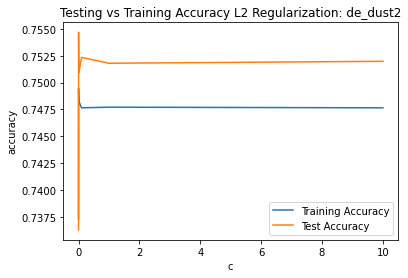

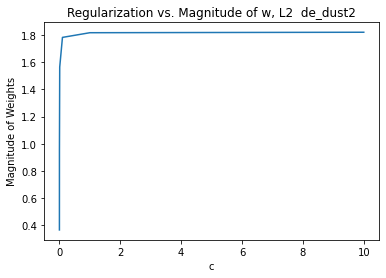

Accuracy on training data = 0.731325
Accuracy on testing data = 0.737107
Accuracy on training data = 0.748460
Accuracy on testing data = 0.756593
Accuracy on training data = 0.747844
Accuracy on testing data = 0.751386
Accuracy on training data = 0.747956
Accuracy on testing data = 0.750042
Accuracy on training data = 0.748460
Accuracy on testing data = 0.749706
Accuracy on training data = 0.748516
Accuracy on testing data = 0.749706


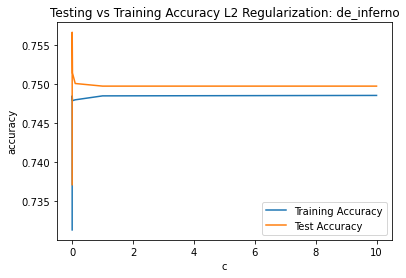

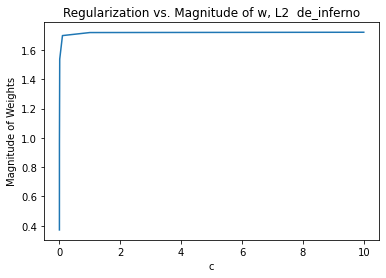

Accuracy on training data = 0.733249
Accuracy on testing data = 0.735968
Accuracy on training data = 0.745795
Accuracy on testing data = 0.740593
Accuracy on training data = 0.747407
Accuracy on testing data = 0.747950
Accuracy on training data = 0.745094
Accuracy on testing data = 0.746479
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689
Accuracy on training data = 0.745024
Accuracy on testing data = 0.746689


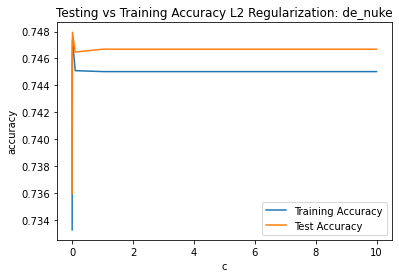

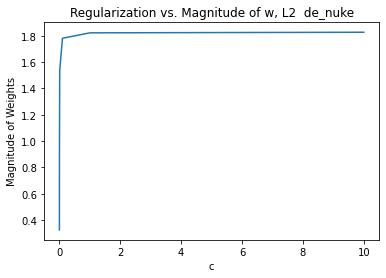

Accuracy on training data = 0.743181
Accuracy on testing data = 0.734711
Accuracy on training data = 0.752871
Accuracy on testing data = 0.741602
Accuracy on training data = 0.751794
Accuracy on testing data = 0.742463
Accuracy on training data = 0.751866
Accuracy on testing data = 0.739449
Accuracy on training data = 0.751723
Accuracy on testing data = 0.739664
Accuracy on training data = 0.751723
Accuracy on testing data = 0.739664


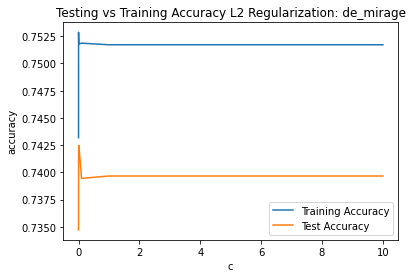

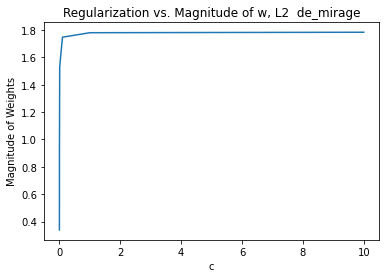

Accuracy on training data = 0.748011
Accuracy on testing data = 0.750355
Accuracy on training data = 0.760795
Accuracy on testing data = 0.758591
Accuracy on training data = 0.760606
Accuracy on testing data = 0.761715
Accuracy on training data = 0.759186
Accuracy on testing data = 0.763419
Accuracy on training data = 0.758144
Accuracy on testing data = 0.763135
Accuracy on training data = 0.757670
Accuracy on testing data = 0.761999


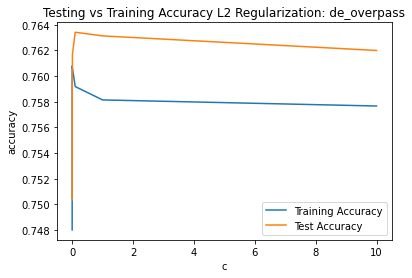

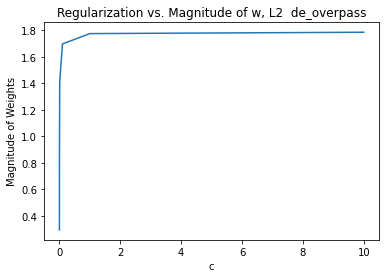

Accuracy on training data = 0.740781
Accuracy on testing data = 0.750808
Accuracy on training data = 0.757064
Accuracy on testing data = 0.748654
Accuracy on training data = 0.759219
Accuracy on testing data = 0.751885
Accuracy on training data = 0.757423
Accuracy on testing data = 0.754039
Accuracy on training data = 0.757184
Accuracy on testing data = 0.752962
Accuracy on training data = 0.757304
Accuracy on testing data = 0.752962


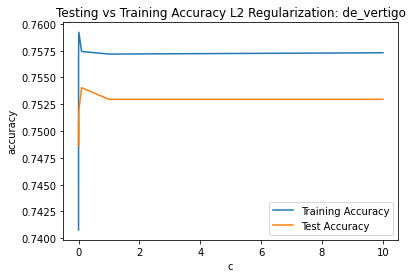

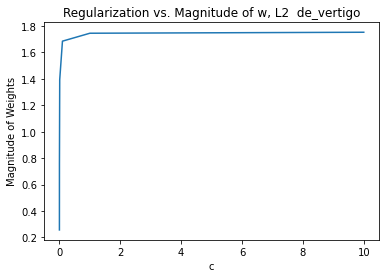

Accuracy on training data = 0.732754
Accuracy on testing data = 0.733472
Accuracy on training data = 0.748270
Accuracy on testing data = 0.749481
Accuracy on training data = 0.752520
Accuracy on testing data = 0.756893
Accuracy on training data = 0.750544
Accuracy on testing data = 0.758968
Accuracy on training data = 0.750049
Accuracy on testing data = 0.758968
Accuracy on training data = 0.750049
Accuracy on testing data = 0.758672


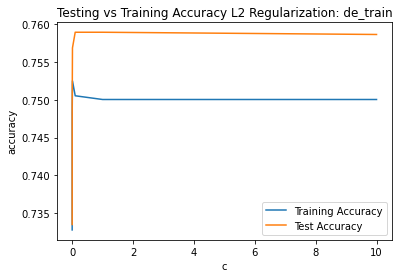

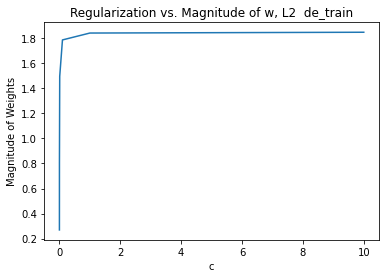

In [10]:
logreg_l2(cVals,df_lst)

In [11]:
#create polynomialfeatures object
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
#logreg with l1 regularization and polynomial features, refer to above function for notes

def logreg_poly(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []   
        w = []
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

        df = dataf.drop(["map","round_winner"], axis = 1)
        #transform our feature matrix and scale it
        X_poly = poly.fit_transform(df)
        X_poly_scale=scaler.fit_transform(X_poly)
        X_poly_scale=X_poly_scale.astype(float)
        Y=Y.astype(float)

        

        X_train, X_test, Y_train, Y_test = train_test_split(X_poly_scale, Y, random_state=30)

        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)
        for c in c_lst:
                logreg = LogisticRegression(penalty = 'l1',C=c, solver = 'saga', max_iter=10000)



                logreg.fit(X_train, Y_train)
                weights = logreg.coef_

                w.append(np.sqrt(np.sum(np.square(weights))))
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L1 Regularization Poly: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

                # Use the following function to have a legend
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg Poly L1 Reg %s" % curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, Poly L1 %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, Poly L1 %s" % curr_map, format = 'png')
        plt.show()


Accuracy on training data = 0.541847
Accuracy on testing data = 0.539559
Accuracy on training data = 0.732298
Accuracy on testing data = 0.738981
Accuracy on training data = 0.751144
Accuracy on testing data = 0.751987
Accuracy on training data = 0.771435
Accuracy on testing data = 0.762645
Accuracy on training data = 0.785585
Accuracy on testing data = 0.768064
Accuracy on training data = 0.788656
Accuracy on testing data = 0.768064


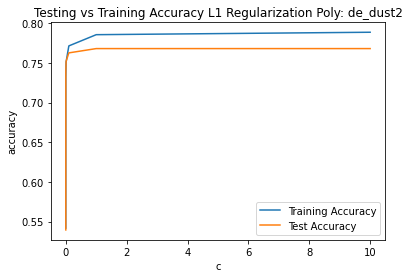

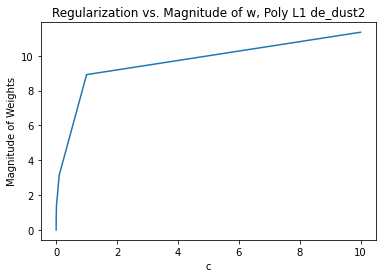

Accuracy on training data = 0.544966
Accuracy on testing data = 0.549135
Accuracy on training data = 0.730989
Accuracy on testing data = 0.737443
Accuracy on training data = 0.750700
Accuracy on testing data = 0.753066
Accuracy on training data = 0.762347
Accuracy on testing data = 0.760121
Accuracy on training data = 0.771195
Accuracy on testing data = 0.761465
Accuracy on training data = 0.773099
Accuracy on testing data = 0.757937


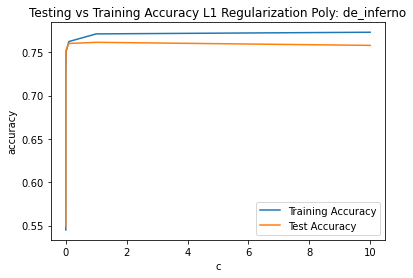

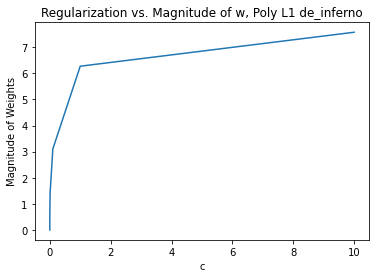

Accuracy on training data = 0.535534
Accuracy on testing data = 0.540887
Accuracy on training data = 0.737174
Accuracy on testing data = 0.739121
Accuracy on training data = 0.749369
Accuracy on testing data = 0.750053
Accuracy on training data = 0.764298
Accuracy on testing data = 0.762035
Accuracy on training data = 0.778315
Accuracy on testing data = 0.776960
Accuracy on training data = 0.780628
Accuracy on testing data = 0.774227


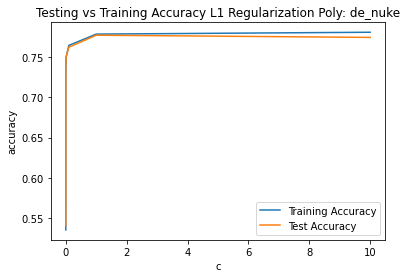

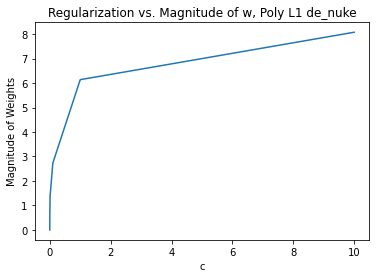

Accuracy on training data = 0.505814
Accuracy on testing data = 0.513566
Accuracy on training data = 0.750646
Accuracy on testing data = 0.739018
Accuracy on training data = 0.758326
Accuracy on testing data = 0.738803
Accuracy on training data = 0.774620
Accuracy on testing data = 0.757967
Accuracy on training data = 0.782013
Accuracy on testing data = 0.761197
Accuracy on training data = 0.786104
Accuracy on testing data = 0.763997


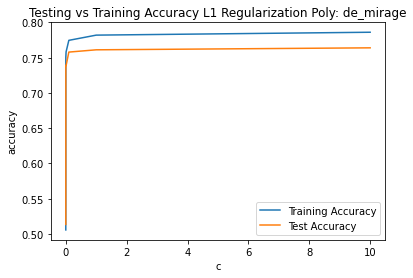

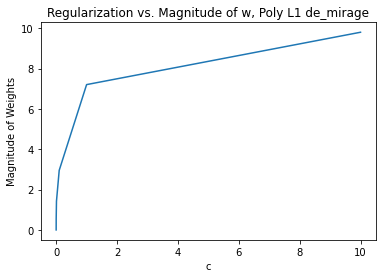

Accuracy on training data = 0.500284
Accuracy on testing data = 0.495030
Accuracy on training data = 0.742898
Accuracy on testing data = 0.741835
Accuracy on training data = 0.760606
Accuracy on testing data = 0.759727
Accuracy on training data = 0.787689
Accuracy on testing data = 0.778472
Accuracy on training data = 0.802557
Accuracy on testing data = 0.773928
Accuracy on training data = 0.805019
Accuracy on testing data = 0.772224


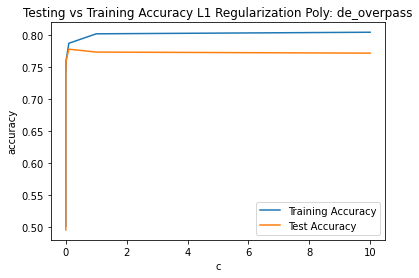

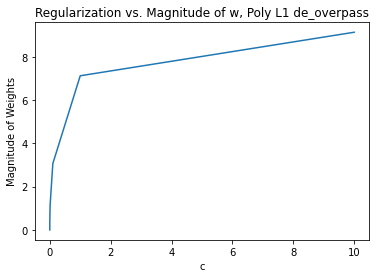

Accuracy on training data = 0.531011
Accuracy on testing data = 0.525314
Accuracy on training data = 0.720187
Accuracy on testing data = 0.720646
Accuracy on training data = 0.756346
Accuracy on testing data = 0.753321
Accuracy on training data = 0.793103
Accuracy on testing data = 0.776302
Accuracy on training data = 0.808788
Accuracy on testing data = 0.777738
Accuracy on training data = 0.814176
Accuracy on testing data = 0.779533


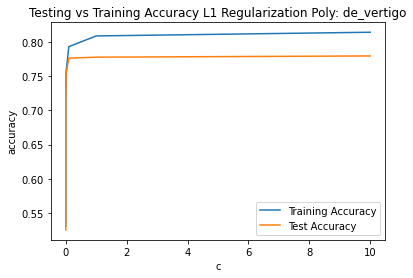

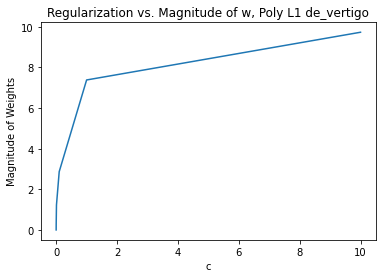

Accuracy on training data = 0.544574
Accuracy on testing data = 0.533650
Accuracy on training data = 0.736410
Accuracy on testing data = 0.745627
Accuracy on training data = 0.752421
Accuracy on testing data = 0.763712
Accuracy on training data = 0.770607
Accuracy on testing data = 0.766973
Accuracy on training data = 0.793042
Accuracy on testing data = 0.772902
Accuracy on training data = 0.797786
Accuracy on testing data = 0.776164


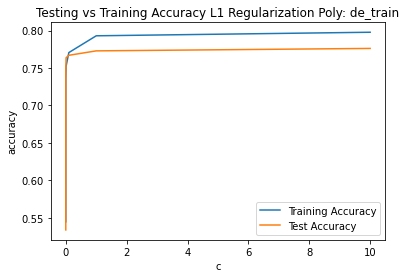

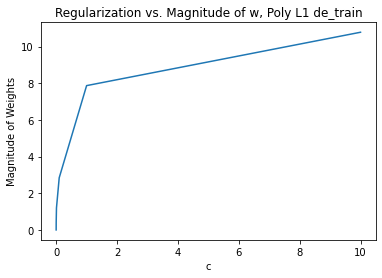

In [12]:
logreg_poly(cVals,df_lst)

In [13]:
#logreg with l2 regularization with polynomial features
def logreg_poly2(c_lst, data_lst):
   
    for dataf in df_lst:
        curr_map = dataf.iloc[0,dataf.columns.get_loc('map')]
        plt.clf()
        acc_train_logreg = []
        acc_test_logreg = []
        c_logreg = []  
        w = []
        
        Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])

        df = dataf.drop(["map","round_winner"], axis = 1)
        #transform our feature matrix and scale it
        X_poly = poly.fit_transform(df)
        X_poly_scale=scaler.fit_transform(X_poly)
        X_poly_scale=X_poly_scale.astype(float)
        Y=Y.astype(float)
        
        X_train, X_test, Y_train, Y_test = train_test_split(X_poly_scale, Y, random_state=30)
                
        Y_train = Y_train.reshape(Y_train.shape[0],)
        Y_test = Y_test.reshape(Y_test.shape[0],)
        for c in c_lst:
                logreg = LogisticRegression(C=c, max_iter=10000)



                logreg.fit(X_train, Y_train)
                weights = logreg.coef_

                w.append(np.sqrt(np.sum(np.square(weights))))
                
                Yhat_train= logreg.predict(X_train)
                Yhat_test = logreg.predict(X_test)

                # Find the accuracy achieved on training set using logreg.score and y_train as type of int
                acc_train = accuracy_score(Y_train,Yhat_train)
                print("Accuracy on training data = %f" % acc_train)
                acc_train_logreg.append(acc_train)

                acc_test = accuracy_score(Y_test,Yhat_test)
                print("Accuracy on testing data = %f" % acc_test)
                acc_test_logreg.append(acc_test)
                c_logreg.append(c)

        plt.plot(c_logreg, acc_train_logreg)
        plt.plot(c_logreg, acc_test_logreg)

        plt.title("Testing vs Training Accuracy L2 Regularization Poly: %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("accuracy")

                # Use the following function to have a legend
        plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
        plt.savefig("LogReg Poly L2 Reg Poly %s"% curr_map)
        plt.show()
        
        plt.plot(c_logreg, w)
        plt.title("Regularization vs. Magnitude of w, Poly L2 %s" % curr_map)
        plt.xlabel("c")
        plt.ylabel("Magnitude of Weights")
        plt.savefig("Regularization vs. Magnitude of w, Poly L2 %s" % curr_map, format = 'png')
        plt.show()
        


Accuracy on training data = 0.746929
Accuracy on testing data = 0.750903
Accuracy on training data = 0.757346
Accuracy on testing data = 0.755600
Accuracy on training data = 0.770231
Accuracy on testing data = 0.760296
Accuracy on training data = 0.782153
Accuracy on testing data = 0.766618
Accuracy on training data = 0.788295
Accuracy on testing data = 0.767883
Accuracy on training data = 0.789981
Accuracy on testing data = 0.769328


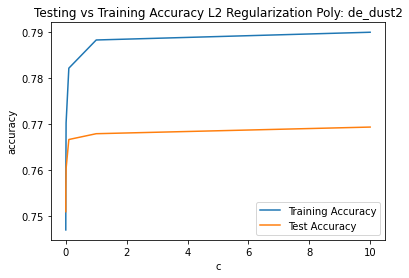

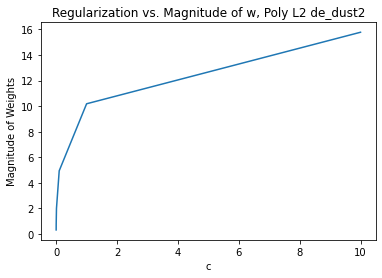

Accuracy on training data = 0.741628
Accuracy on testing data = 0.746850
Accuracy on training data = 0.756412
Accuracy on testing data = 0.753402
Accuracy on training data = 0.761843
Accuracy on testing data = 0.761801
Accuracy on training data = 0.768675
Accuracy on testing data = 0.759953
Accuracy on training data = 0.773379
Accuracy on testing data = 0.759785
Accuracy on training data = 0.773491
Accuracy on testing data = 0.760289


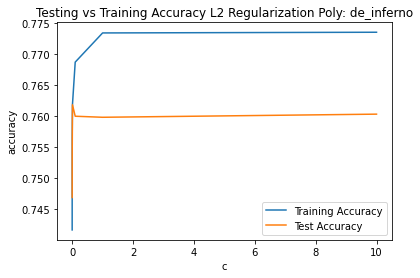

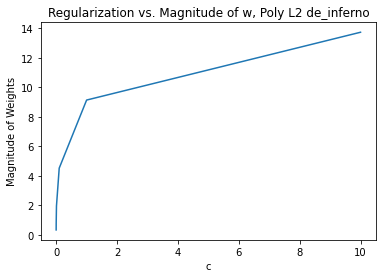

Accuracy on training data = 0.750070
Accuracy on testing data = 0.740803
Accuracy on training data = 0.755257
Accuracy on testing data = 0.750263
Accuracy on training data = 0.767592
Accuracy on testing data = 0.760774
Accuracy on training data = 0.777895
Accuracy on testing data = 0.773807
Accuracy on training data = 0.782030
Accuracy on testing data = 0.775489
Accuracy on training data = 0.785464
Accuracy on testing data = 0.772966


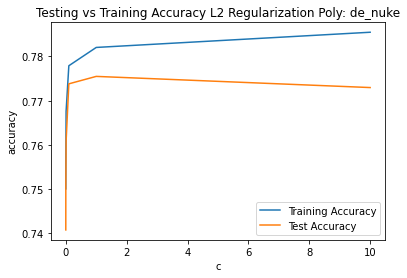

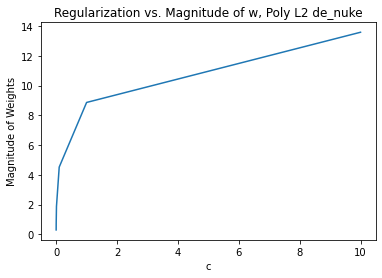

Accuracy on training data = 0.755096
Accuracy on testing data = 0.739449
Accuracy on training data = 0.764140
Accuracy on testing data = 0.748493
Accuracy on training data = 0.774332
Accuracy on testing data = 0.758829
Accuracy on training data = 0.781008
Accuracy on testing data = 0.760551
Accuracy on training data = 0.785314
Accuracy on testing data = 0.764858
Accuracy on training data = 0.787539
Accuracy on testing data = 0.760767


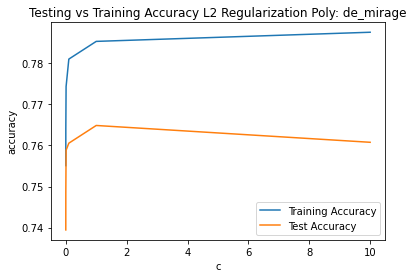

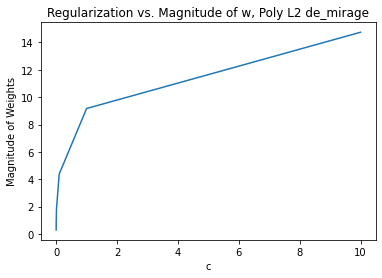

Accuracy on training data = 0.761553
Accuracy on testing data = 0.761147
Accuracy on training data = 0.773958
Accuracy on testing data = 0.770520
Accuracy on training data = 0.788258
Accuracy on testing data = 0.777620
Accuracy on training data = 0.801610
Accuracy on testing data = 0.773928
Accuracy on training data = 0.805208
Accuracy on testing data = 0.774212
Accuracy on training data = 0.804640
Accuracy on testing data = 0.774212


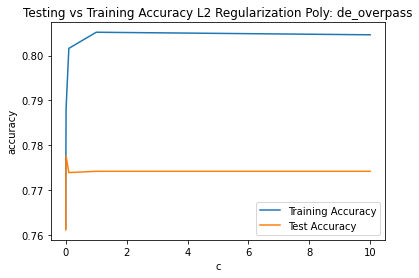

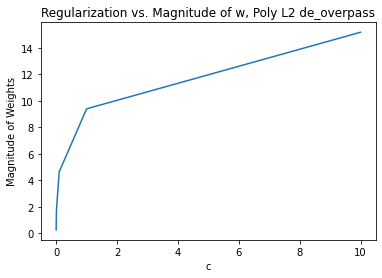

Accuracy on training data = 0.760896
Accuracy on testing data = 0.753321
Accuracy on training data = 0.772031
Accuracy on testing data = 0.756194
Accuracy on training data = 0.788793
Accuracy on testing data = 0.782765
Accuracy on training data = 0.807232
Accuracy on testing data = 0.781329
Accuracy on training data = 0.813937
Accuracy on testing data = 0.779892
Accuracy on training data = 0.813578
Accuracy on testing data = 0.775224


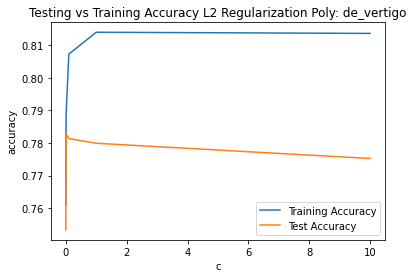

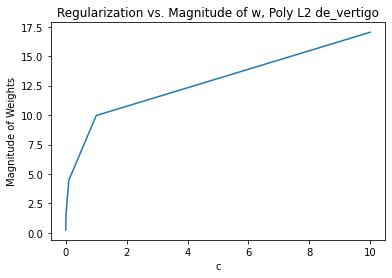

Accuracy on training data = 0.746689
Accuracy on testing data = 0.749185
Accuracy on training data = 0.754892
Accuracy on testing data = 0.756597
Accuracy on training data = 0.769915
Accuracy on testing data = 0.762526
Accuracy on training data = 0.788298
Accuracy on testing data = 0.770827
Accuracy on training data = 0.798478
Accuracy on testing data = 0.776164
Accuracy on training data = 0.800455
Accuracy on testing data = 0.775571


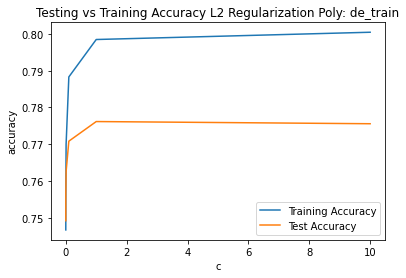

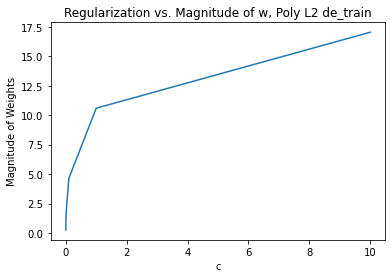

In [14]:
logreg_poly2(cVals,df_lst)